#### Import Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Data historis berisi data pembelian dan pengiriman toko online 2014.

#### Atribut
- orderItemID: Nomor barang pesanan
- orderDate: Tanggal pemesanan
- deliveryDate : Tanggal pesanan dikirim
- itemID: ID barang
- size: Ukuran barang
- color: Warna barang
- manufacturerID: ID manufaktur/pabrik
- price: Harga barang
- customerID: ID pelanggan
- salutation: Salutation pelanggan
- dateOfBirth: Tanggal lahir pelanggan
- state: Negara pelanggan
- creationDate: Tanggal pembuatan akun

#### Atribut Keluaran
- returnShipment: Pengembalian (1=ya/dikembalikan, 0=tidak/disimpan)
    - Memprediksi apakah ada pengembalian barang pada pembelian berdasarkan data pembelian baru toko tersebut. Atribut target "returnShipment" dari item pesanan. Nilai "0" berarti "barang disimpan" dan nilai "1" berarti "barang dikembalikan".

In [2]:
#load dataset
df = pd.read_csv("D:\\dmw\\dataset\\orders_train.txt", sep=';', na_values=["?"])

In [3]:
df.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,NaN,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0
4,5,2012-04-02,1990-12-31,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0


#### Eksplorasi Data

In [4]:
#melihat dimensi dataset
df.shape

(481092, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
orderItemID       481092 non-null int64
orderDate         481092 non-null object
deliveryDate      441673 non-null object
itemID            481092 non-null int64
size              481092 non-null object
color             480949 non-null object
manufacturerID    481092 non-null int64
price             481092 non-null float64
customerID        481092 non-null int64
salutation        481092 non-null object
dateOfBirth       432203 non-null object
state             481092 non-null object
creationDate      481092 non-null object
returnShipment    481092 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


dari detail info atribut tersebut pada dataset terdapat 481092 record dan 14 atribut/kolom

In [6]:
#cek duplikat data
duplicate = df.duplicated()
print(duplicate.sum())

0


In [7]:
#cek data kosong
df.isnull().sum()

orderItemID           0
orderDate             0
deliveryDate      39419
itemID                0
size                  0
color               143
manufacturerID        0
price                 0
customerID            0
salutation            0
dateOfBirth       48889
state                 0
creationDate          0
returnShipment        0
dtype: int64

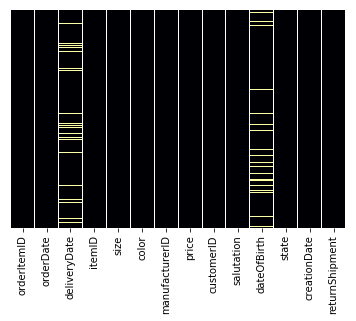

In [8]:
#visualisasi data kosong
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='inferno')

In [9]:
df_na = [a for a in df.columns if df[a].isna().sum()>0]
for a in df_na:
    print(a, np.round(df[a].isna().mean()*100,4), '%')

deliveryDate 8.1937 %
color 0.0297 %
dateOfBirth 10.1621 %


dari pengecekan data kosong di atas, data tanggal lahir (dateOfBirth) paling banyak memiliki data kosong sebanyak 48889 atau 10%, kemudian diikuti oleh data tanggal pengiriman (deliveryDate)

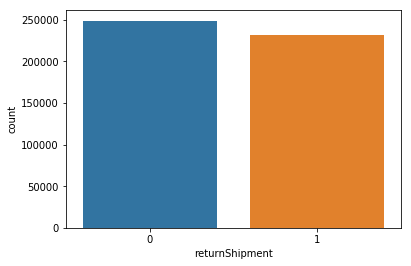

In [10]:
#visualisasi data yang melakukan pengembalian barang dan yang tidak melakukan pengembalian (tetap disimpan)
sns.countplot(x='returnShipment',data = df)

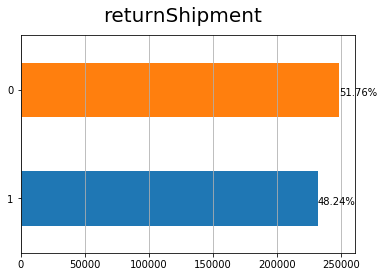

In [11]:
#melihat persentase yg mengembalikan dengan yg tidak mengembalikan
y = "returnShipment"
ax = df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

dari visualisasi-visualisasi terhadap atribut target "returnShipment" di atas, dapat dilihat bahwa antara data yang mengembalikan dengan yang tidak mengembalikan barang cukup seimbang. dimana yang tidak mengembalikan barang persentasenya lebih tinggi dibandingkan yang mengembalikan barang

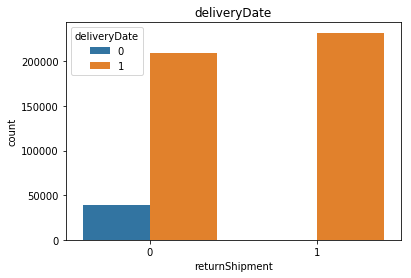

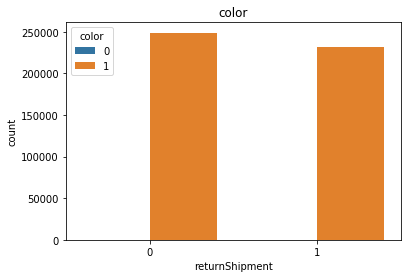

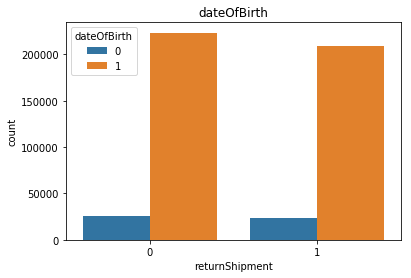

In [12]:
#visualisasi perngaruh nilai/data kosong terhadap returnShipemnt(pengembalian atau tidak)
data = df.copy()
for a in df_na:
    data_na = data.copy()
    data_na[a] = np.where(data_na[a].isna(),0,1)
    sns.countplot(x='returnShipment',hue = a ,data = data_na)
    plt.title(a)
    plt.show()

visualisasi di atas returnShipment memiliki value terhadap data kosong, yang dapat menunjukan bahwa atribut returnShipent dapat dipengaruhi oleh atribut-atribut tersebut

#### Menangani Data Kosong

In [13]:
#menangani data kosong pada atribut color
#isi data kosong atribut color dengan warna yang paling banyak digunakan (menggunakan modus)
df.color.fillna(df.color.mode()[0], inplace=True)

In [14]:
#cek data kosong kembali
df.isnull().sum()

orderItemID           0
orderDate             0
deliveryDate      39419
itemID                0
size                  0
color                 0
manufacturerID        0
price                 0
customerID            0
salutation            0
dateOfBirth       48889
state                 0
creationDate          0
returnShipment        0
dtype: int64

atribut color sudah tidak terdapat nilai kosong lagi

#### untuk atribut yang masih memiliki nilai kosong, diubah tipe datanya terlebih dahulu dari tipe data objek ke tipe datatime64[ns]

In [15]:
#karena terdapat out-of-bound, tambahkan errors untuk mengabaikannya
#konversi data deliveryDate objek menjadi datetime64[ns]
df["deliveryDate"] = pd.to_datetime(df["deliveryDate"], format='%Y-%m-%d', errors = 'coerce')
#konversi data dateOfBirth objek menjadi datetime64[ns]
df["dateOfBirth"] = pd.to_datetime(df["dateOfBirth"], format='%Y-%m-%d', errors = 'coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
orderItemID       481092 non-null int64
orderDate         481092 non-null object
deliveryDate      441673 non-null datetime64[ns]
itemID            481092 non-null int64
size              481092 non-null object
color             481092 non-null object
manufacturerID    481092 non-null int64
price             481092 non-null float64
customerID        481092 non-null int64
salutation        481092 non-null object
dateOfBirth       432200 non-null datetime64[ns]
state             481092 non-null object
creationDate      481092 non-null object
returnShipment    481092 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(6)
memory usage: 51.4+ MB


In [17]:
#melihat nilai maks dan min dari tanggal pada atribut deliveryDate dan dateOfBirth yang masih memiliki nilai null
print("Tanggal Maks deliveryDate :", df.deliveryDate.max(), "| Tanggal Min deliveryDate :", df.deliveryDate.min())
print("Tanggal Maks dateOfBirth :", df.dateOfBirth.max(), "| Tanggal Min dateOfBirth :", df.dateOfBirth.min())

Tanggal Maks deliveryDate : 2013-07-22 00:00:00 | Tanggal Min deliveryDate : 1990-12-31 00:00:00
Tanggal Maks dateOfBirth : 2013-06-27 00:00:00 | Tanggal Min dateOfBirth : 1900-11-19 00:00:00


In [18]:
#mengisi data kosong deliveryDate dengan nilai maks pada data deliveryDate
df["deliveryDate"].fillna(pd.Timestamp('20130722'), inplace=True)
#mengisi data kosong dateofbirth dengan awal tanggal dan bulan tahun minimal pada data dateofbirth
df["dateOfBirth"].fillna(pd.Timestamp('19000101'), inplace=True)

In [19]:
df.isnull().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
returnShipment    0
dtype: int64

sudah tidak terdapat nilai kosong

#### Menangani data yang memiliki arti yang sama tetapi dikenali sebagai data yang berbeda

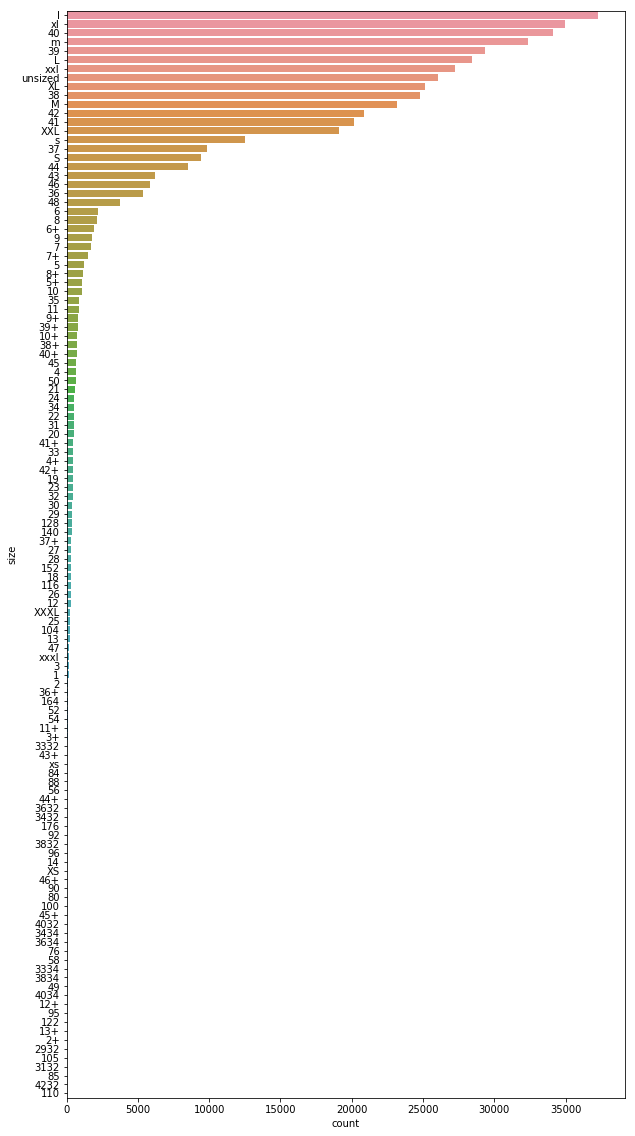

In [20]:
#visualisasi data size
plt.figure(figsize = (10, 20))
sns.countplot(y="size", data=df, order = df["size"].value_counts().index)
plt.show()

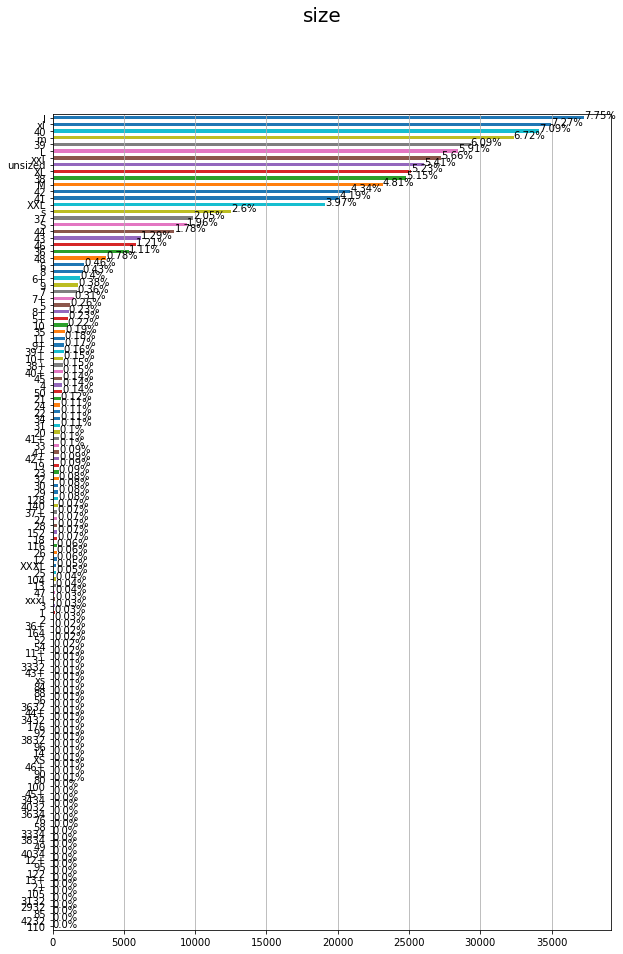

In [21]:
#melihat persentase data size
plt.figure(figsize = (10, 15))
y = "size"
ax = df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

dari visualisasi-visualisasi atribut size di atas terdapat ukuran yang menggunakan huruf kecil dan huruf kapital misalnya ukuran m dan M yang merupakan jenis ukuran yang sama tetapi dikategorikan berbeda. Untuk mencegah hal tersebut saya mencoba mengubah semua ukuran yang menggunakan huruf kecil dengan huruf kapital agar terhitung sebagai kategori yang sama. Kemudian untuk ukuran yang memiliki karakter "+" akan dihapus, dibulatkan ke angka saja misal ukuran 9+ akan diubah menjadi 9 dengan asumsi hanya memiliki selisih sedikit

In [22]:
#mengubah isi data size yang ukurannya huruf kecil dengan huruf kapital agar terhitung menjadi jenis yang sama.
df['size'] = df['size'].str.upper()

In [23]:
#menghilangkan karakter "+"
df['size'] = df['size'].str.replace('+', '')

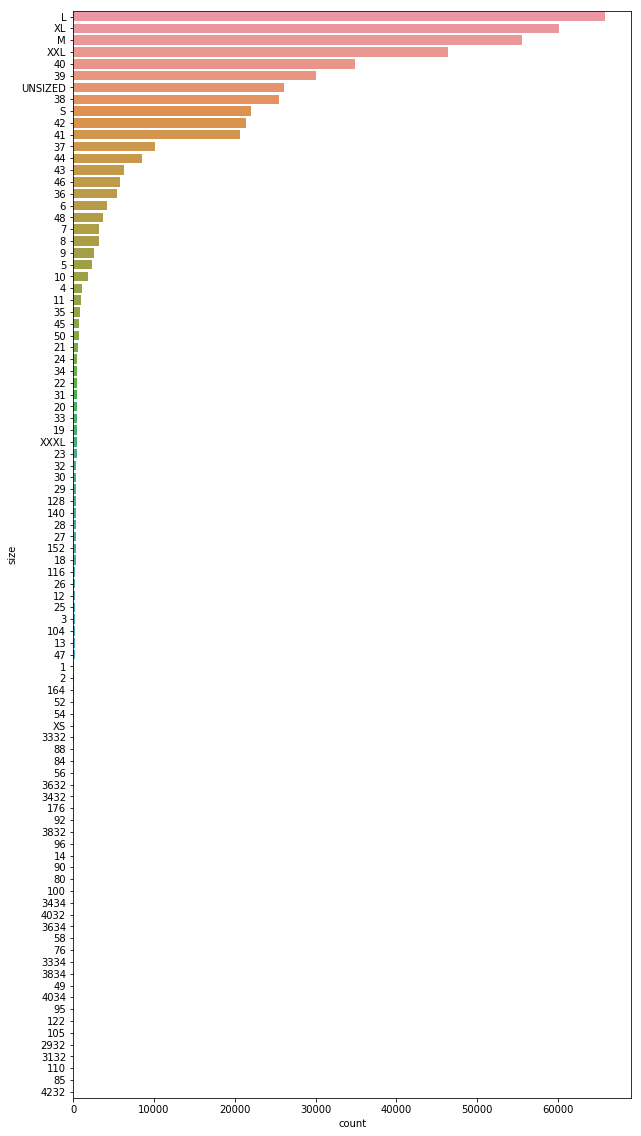

In [24]:
#visualisasi data size setelah diubah
plt.figure(figsize = (10, 20))
sns.countplot(y="size", data=df, order = df["size"].value_counts().index)
plt.show()

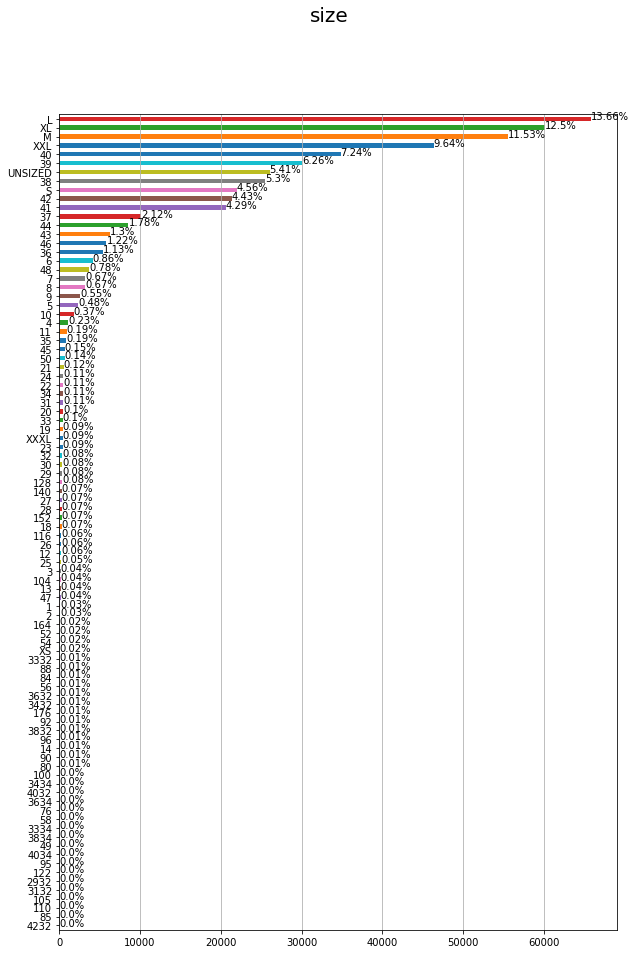

In [25]:
#melihat presentasi data size setelah diubah
plt.figure(figsize = (10, 15))
y = "size"
ax = df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

dari visualisasi-visualisasi terhadap atribut size yang sudah diubah, dapat dilihat persentase sebelum dan sesudah diubah berbeda. misalnya pada size L sebelum diubah hanya 5,9% karena hanya menghitung size dengan huruf kapital. setelah diubah persentase size L menjadi 13,6%

#### Konversi data yang masih bertipe objek

In [26]:
#cek atribut dengan tipe data objek
df_obj= df.select_dtypes(include = ['object'])
df_obj.head()

,orderDate,size,color,salutation,state,creationDate
0,2012-04-01,M,denim,Mrs,Baden-Wuerttemberg,2011-04-25
1,2012-04-01,9,ocher,Mrs,Baden-Wuerttemberg,2011-04-25
2,2012-04-01,9,curry,Mrs,Baden-Wuerttemberg,2011-04-25
3,2012-04-02,M,green,Mrs,Saxony,2012-01-04
4,2012-04-02,39,black,Mrs,Rhineland-Palatinate,2011-02-16


#### Mengubah data bertipe objek menjadi data bertipe kategori, jika data objek berformat tanggal diubah menjadi tipe data datetime64[ns]

In [27]:
#konversi data tipe objek menjadi kategori
#mengubah type data objek selain format tanggal menjadi kategori
kategori = ['size', 'color', 'salutation', 'state']
#Looping untuk merubah type data'
for column in kategori:
    df[column] = df[column].astype('category')

In [28]:
#mengubah type data objek dengan format tanggal menjadi datetime64[ns]
#konversi data atribut orderDate menjadi datetime64[ns]
df["orderDate"] = df["orderDate"].astype("datetime64[ns]")
#Konversi data atribut creationDate menjadi datetime64[ns]
df["creationDate"] = df["creationDate"].astype("datetime64[ns]")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
orderItemID       481092 non-null int64
orderDate         481092 non-null datetime64[ns]
deliveryDate      481092 non-null datetime64[ns]
itemID            481092 non-null int64
size              481092 non-null category
color             481092 non-null category
manufacturerID    481092 non-null int64
price             481092 non-null float64
customerID        481092 non-null int64
salutation        481092 non-null category
dateOfBirth       481092 non-null datetime64[ns]
state             481092 non-null category
creationDate      481092 non-null datetime64[ns]
returnShipment    481092 non-null int64
dtypes: category(4), datetime64[ns](4), float64(1), int64(5)
memory usage: 38.5 MB


semua data bertipe objek sudah diubah menjadi kategori

#### Visualisasi data bertipe kategori

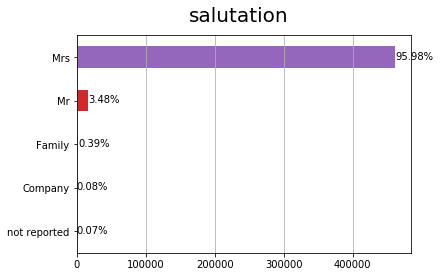

In [30]:
#visualisasi persentase data salutation
y = "salutation"
ax = df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

pada data salutation atau panggilan pengguna, panggilan Mrs. mendominasi pemesanan barang sebanyak 95,98%

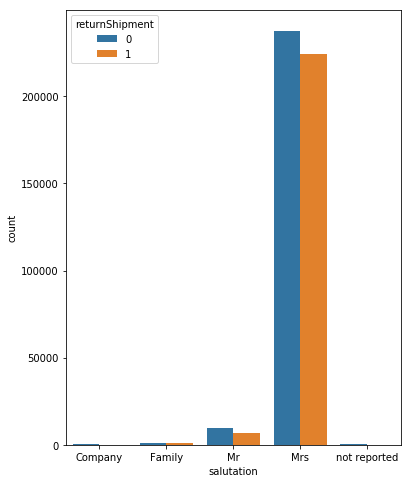

In [31]:
#visualisasi hubungan salutation dengan returnShipment
plt.figure(figsize=(6,8))
sns.countplot(x="salutation", hue = "returnShipment", data=df)

salutation atau panggilan pengguna Mrs. (mendominasi data salutation) yang tidak mengembalikan barang atau tetap disimpan sedikit lebih banyak dibandingkan yang mengembalikan

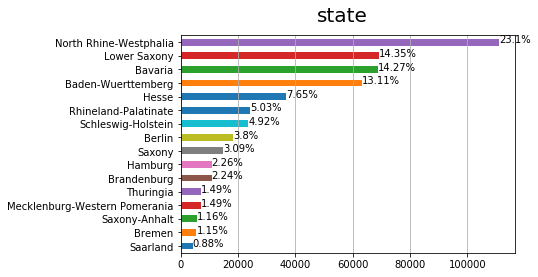

In [32]:
#visualisasi persentase data state
y = "state"
ax = df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

dari visualisasi di atas, state atau negara yang paling banyak memesan barang yaitu Nort Rhine-Westphalia dengan persentase 23%

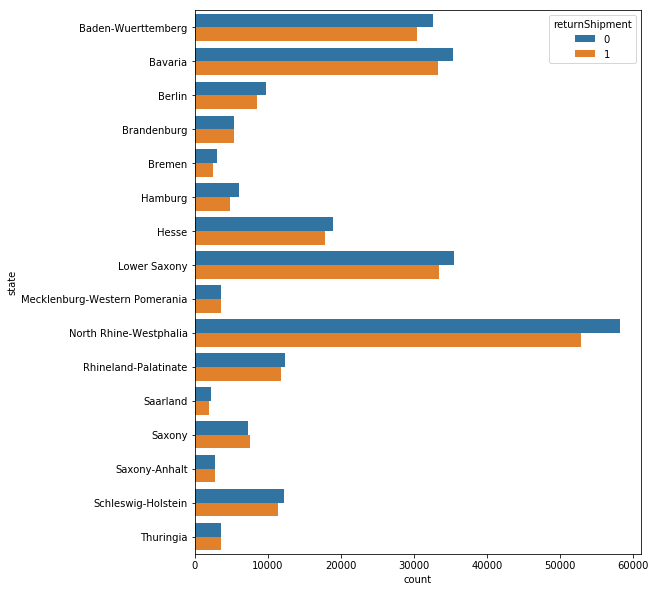

In [33]:
#visualisasi hubungan state dengan returnShipment
plt.figure(figsize=(8,10))
sns.countplot(y="state", hue = "returnShipment", data=df)

state Nort Rhine-Westphalia (mendominasi data state) yang tidak mengembalikan barang lebih banyak dibandingkan yang mengembalikan. Begitupun dengan state-state lainnya lebih banyak tidak mengembalikan barang dibandingkan yang mengembalikan barang

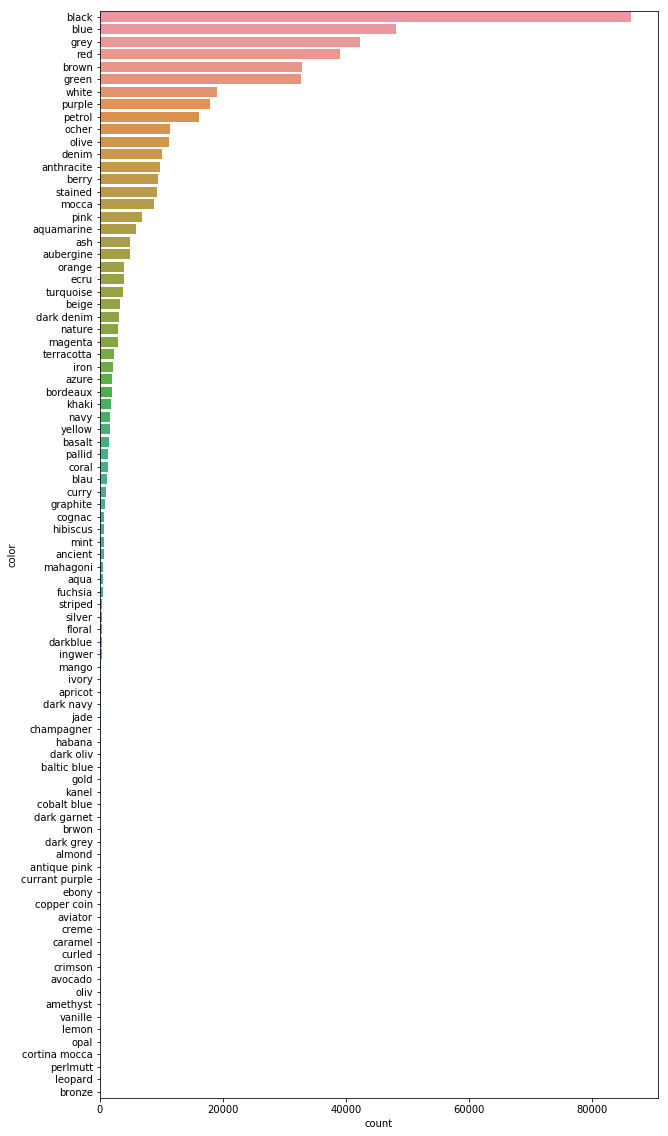

In [34]:
#visualisasi data color
plt.figure(figsize = (10, 20))
sns.countplot(y="color", data=df, order = df["color"].value_counts().index)
plt.show()

barang dengan warna hitam paling banyak dipesan

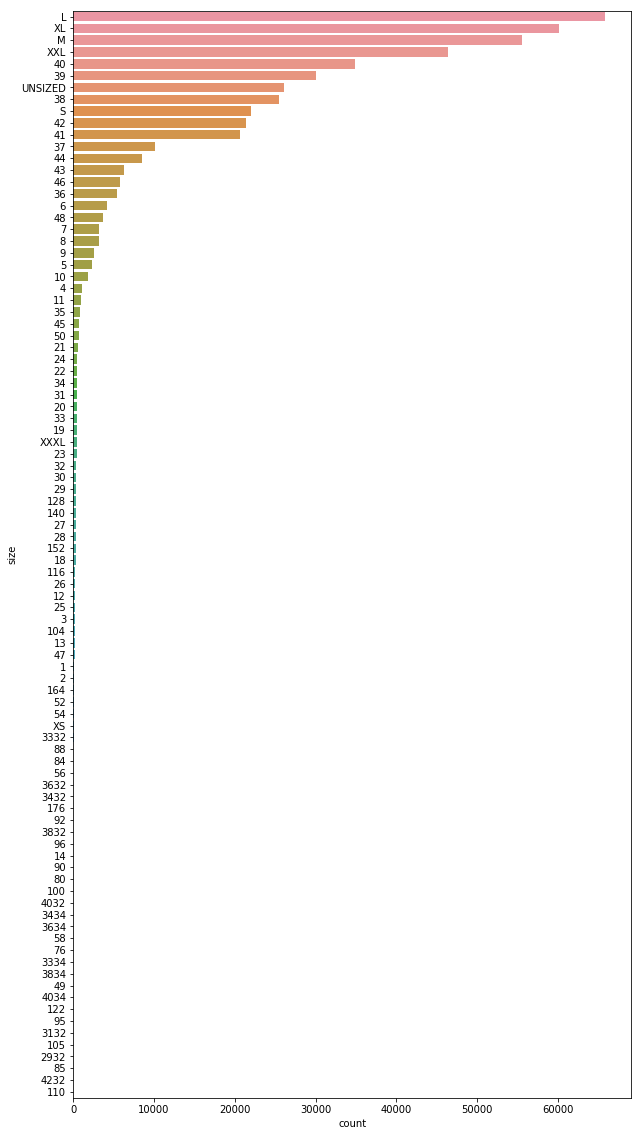

In [35]:
#visualisasi data size
plt.figure(figsize = (10, 20))
sns.countplot(y="size", data=df, order = df["size"].value_counts().index)
plt.show()

barang dengan size L paling banyak dipesan

#### Menangani Outlier

In [36]:
df[['price']].describe()

,price
count,481092.000000
mean,70.440229
std,45.502854
min,0.000000
25%,34.900000
50%,59.900000
75%,89.900000
max,999.000000


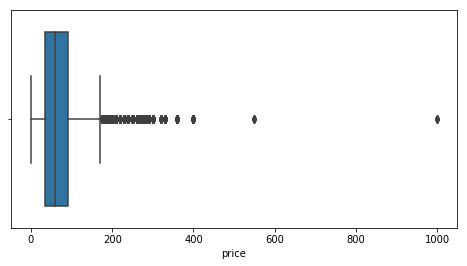

In [37]:
#visualisasi outlier pada data price
plt.figure(figsize = (8, 4))
sns.boxplot(x = df.price)

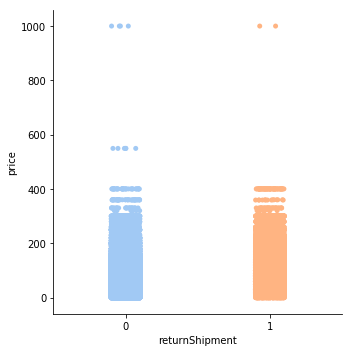

In [38]:
#visualisasi price dengan returnShipment
sns.catplot(x='returnShipment', y='price', hue = 'returnShipment', data = df, palette='pastel')

In [39]:
#menghitung 0.999 persentile dari atribut price
max_price = df.price.quantile(0.999)
max_price

299.9

In [40]:
#remove data outlier
df = df[(df.price<max_price)]

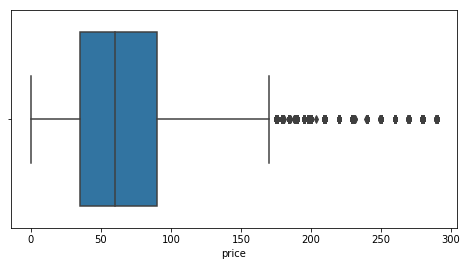

In [41]:
#visualisasi setelah dilakukan penghapusan outlier
plt.figure(figsize = (8, 4))
sns.boxplot(x = df.price)

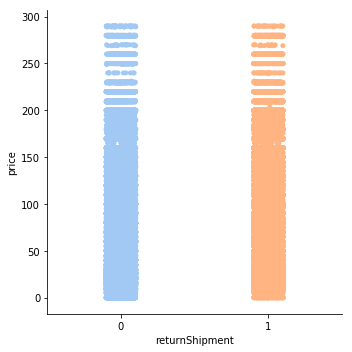

In [42]:
#visualisasi setelah dilakukan penghapusan outlier atribut price dengan returnShipment
sns.catplot(x='returnShipment', y='price', hue = 'returnShipment', data = df, palette='pastel')

In [43]:
#describe price setelah penghapusan outlier
df[['price']].describe()

,price
count,480358.000000
mean,70.047077
std,44.318646
min,0.000000
25%,34.900000
50%,59.900000
75%,89.900000
max,289.900000


In [44]:
df.groupby(["state", "salutation"])["price"].mean()

state                   salutation  
Baden-Wuerttemberg      Company          83.040541
                        Family           66.088417
                        Mr               75.853305
                        Mrs              69.760495
                        not reported     60.827778
Bavaria                 Company          78.983333
                        Family           86.565116
                        Mr               78.310058
                        Mrs              70.531568
                        not reported     72.862295
Berlin                  Company          63.115385
                        Family          118.009615
                        Mr               77.592653
                        Mrs              68.514332
                        not reported     22.400000
Brandenburg             Company          34.900000
                        Family           81.255102
                        Mr               71.041335
                        Mrs              67.3

rata-rata harga barang dikelompokkan berdasarkan state dan salutation. rata-rata harga barang pada state Bremen paling tinggi dipesan oleh pengguna dengan salutation not reported (customer dengan panggilan yang belum dilaporkan). diikuti oleh negara Berlin dipesan oleh customer dengan salutation Family.

#### Visualisasi Data lainnya

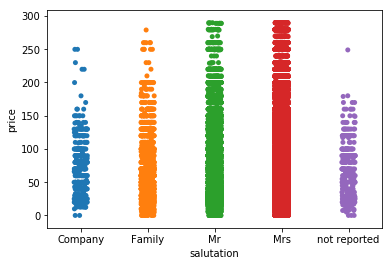

In [45]:
sns.stripplot(x='salutation', y='price', data=df)

untuk setiap salutation (panggilan pengguna) memesan barang dengan kisaran harga yang merata

C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


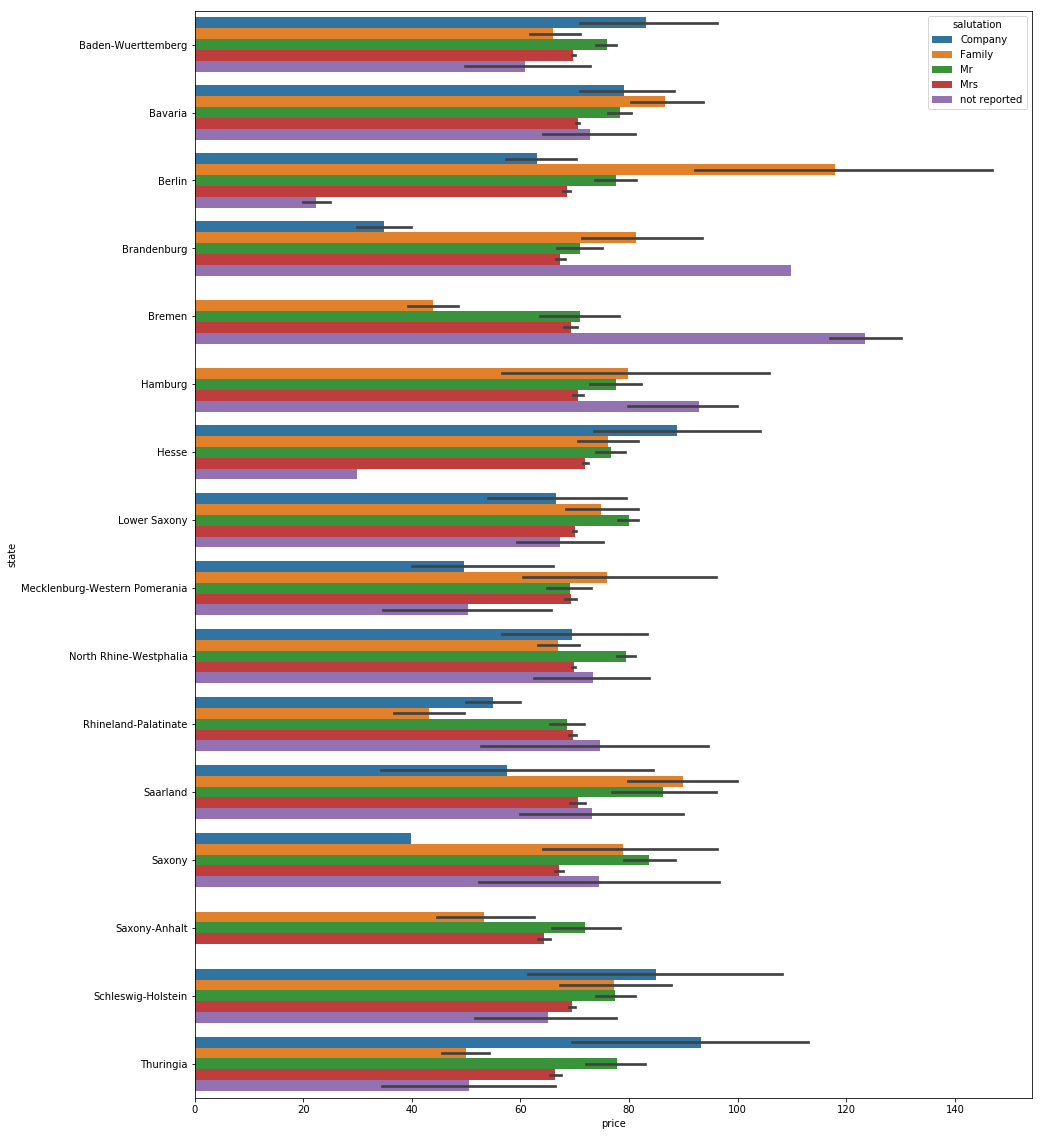

In [46]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.barplot(x='price', y='state', hue='salutation', data=df)

dari grafik di atas dapat diketahui state/negara Breman memiliki harga pemesanan barang paling tinggi yang dipesan oleh salutation atau panggilan pengguna not reported. Tempat tinggal dengan harga pemesanan paling tinggi selanjutnya adalah Berlin yang dipesan oleh panggilan pengguna atau salutaion Family

In [47]:
df_train = df.copy()

In [48]:
#encoding atribut returnShipment menggunakan LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train.returnShipment)
Y = le.transform(df_train.returnShipment)

In [49]:
#mengaplikasikan one hot encoding untuk data bertipe categorical
df_train=pd.get_dummies(data=df_train, columns=['size', 'color', 'salutation', 'state'])

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480358 entries, 0 to 481091
Columns: 210 entries, orderItemID to state_Thuringia
dtypes: datetime64[ns](4), float64(1), int64(5), uint8(200)
memory usage: 131.9 MB


In [51]:
#Siapkan atribut training dengan membuang kelas label (kelas label sudah pindah ke variabel Y sebelumnya)
X = df_train.drop("returnShipment",axis=1)

In [52]:
df_train.head()

,orderItemID,orderDate,deliveryDate,itemID,manufacturerID,price,customerID,dateOfBirth,creationDate,returnShipment,...,state_Hesse,state_Lower Saxony,state_Mecklenburg-Western Pomerania,state_North Rhine-Westphalia,state_Rhineland-Palatinate,state_Saarland,state_Saxony,state_Saxony-Anhalt,state_Schleswig-Holstein,state_Thuringia
0,1,2012-04-01,2012-04-03,186,25,69.90,794,1965-01-06,2011-04-25,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2012-04-01,2012-04-03,71,21,69.95,794,1965-01-06,2011-04-25,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2012-04-01,2012-04-03,71,21,69.95,794,1965-01-06,2011-04-25,1,...,0,0,0,0,0,0,0,0,0,0
3,4,2012-04-02,2013-07-22,22,14,39.90,808,1959-11-09,2012-01-04,0,...,0,0,0,0,0,0,1,0,0,0
4,5,2012-04-02,1990-12-31,151,53,29.90,825,1964-07-11,2011-02-16,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
#mengubah data tanggal untuk keperluan pembelajaran
import datetime as dt
X['orderDate'] = X['orderDate'].map(dt.datetime.toordinal)
X['deliveryDate'] = X['deliveryDate'].map(dt.datetime.toordinal)
X['dateOfBirth'] = X['dateOfBirth'].map(dt.datetime.toordinal)
X['creationDate'] = X['creationDate'].map(dt.datetime.toordinal)

#### Training

In [54]:
#Split Dataset, 80% sebagai data train dan 20% sisanya sebagai data test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [55]:
#simpan nama kolom untuk keperluan prediksi nanti
import pickle
with open('D:\\dmw\\dataset\\dmc_pick.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

In [56]:
#cek jumlah data pada returnShipment untuk melihat apakah data target "returShipment" imbalance atau tidak
shipment = len(df)
disimpan_count = len(df[df.returnShipment == 0])
dikembalikan_count = len(df[df.returnShipment == 1])
shipment_percentage = round(dikembalikan_count/disimpan_count*100, 2)

print('Total shipment {}'.format(shipment))
print('Barang tidak dikembalikan {}'.format(disimpan_count))
print('Barang dikembalikan {}'.format(dikembalikan_count))
print('Persentase barang {}'.format(shipment_percentage))

Total shipment 480358
Barang tidak dikembalikan 248699
Barang dikembalikan 231659
Persentase barang 93.15


jumlah data pada returnShipment antara yes/mengembalikan dengan no/disimpan cukup seimbang. persentase barang dikembalikan yaitu 93%

#### Naive Bayes

In [57]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print("F1-Score {}".format(f1))
print(classification_report(Y_test, Y_pred))

Akurasi 0.5529810975102006
F1-Score 0.6176936635390888
              precision    recall  f1-score   support

           0       0.61      0.37      0.46     49761
           1       0.53      0.75      0.62     46311

    accuracy                           0.55     96072
   macro avg       0.57      0.56      0.54     96072
weighted avg       0.57      0.55      0.54     96072



#### Decision Tree

In [58]:
#decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print("F1-Score {}".format(f1))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6151011741194105
F1-Score 0.6027629769680302
              precision    recall  f1-score   support

           0       0.63      0.62      0.63     49761
           1       0.60      0.61      0.60     46311

    accuracy                           0.62     96072
   macro avg       0.61      0.61      0.61     96072
weighted avg       0.62      0.62      0.62     96072



#### Random Forest

In [59]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=70, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print("F1-Score {}".format(f1))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6603797152135898
F1-Score 0.6643071731346969
              precision    recall  f1-score   support

           0       0.69      0.63      0.66     49761
           1       0.63      0.70      0.66     46311

    accuracy                           0.66     96072
   macro avg       0.66      0.66      0.66     96072
weighted avg       0.66      0.66      0.66     96072



#### XGBoost

In [60]:
#xgboost
import xgboost as xgb
clf = xgb.XGBClassifier(objective = "multi:softprob", num_class = 4, 
                        eval_metric = "mlogloss", max_depth = 24, gamma=0.1, 
                        subsample = 0.90,learning_rate=0.01,
                        n_estimators = 10, nthread=-1, use_label_encoder=False)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print("F1-Score {}".format(f1))
print(classification_report(Y_test, Y_pred))

C:\Users\acer\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Akurasi 0.6549775168623533
F1-Score 0.6727935006860606
              precision    recall  f1-score   support

           0       0.70      0.58      0.64     49761
           1       0.62      0.74      0.67     46311

    accuracy                           0.65     96072
   macro avg       0.66      0.66      0.65     96072
weighted avg       0.66      0.65      0.65     96072



In [61]:
#Melihat fitur mana yang paling penting bagi model
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                         importance
size_UNSIZED               0.056598
deliveryDate               0.030577
price                      0.028663
salutation_Mrs             0.013413
color_ancient              0.012067
size_164                   0.012035
salutation_not reported    0.009738
color_navy                 0.009356
manufacturerID             0.007812
color_silver               0.007716
size_56                    0.007465
color_dark grey            0.007286
size_4032                  0.007119
salutation_Company         0.007054
salutation_Family          0.007008
size_26                    0.006982
color_darkblue             0.006976
color_copper coin          0.006863
color_habana               0.006847
color_ecru                 0.006840
size_3634                  0.006759
size_80                    0.006571
color_almond               0.006567
size_128                   0.006527
size_32                    0.006499
color_nature               0.006455
size_35                    0

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[28847 20914]
 [12233 34078]]


In [63]:
#cross validation dengan xgboost
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
def classification_report_with_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    return accuracy_score(y_true, y_pred)
clf = xgb.XGBClassifier(objective = "multi:softprob", num_class = 4, 
                        eval_metric = "mlogloss", max_depth = 24, gamma=0.1, 
                        subsample = 0.90,learning_rate=0.01,
                        n_estimators = 10, nthread=-1, use_label_encoder=False)
clf.fit(X_train, Y_train)
scores = cross_val_score(clf, X=X, y=Y, cv=5, 
                         scoring=make_scorer(classification_report_with_score))
print(scores)

C:\Users\acer\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


              precision    recall  f1-score   support

           0       0.83      0.25      0.39     49740
           1       0.54      0.95      0.69     46332

    accuracy                           0.59     96072
   macro avg       0.69      0.60      0.54     96072
weighted avg       0.69      0.59      0.53     96072

[[12482 37258]
 [ 2480 43852]]


C:\Users\acer\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


              precision    recall  f1-score   support

           0       0.52      0.99      0.68     49740
           1       0.64      0.03      0.05     46332

    accuracy                           0.52     96072
   macro avg       0.58      0.51      0.37     96072
weighted avg       0.58      0.52      0.38     96072

[[49066   674]
 [45126  1206]]


C:\Users\acer\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


              precision    recall  f1-score   support

           0       0.52      0.59      0.55     49740
           1       0.48      0.42      0.45     46332

    accuracy                           0.50     96072
   macro avg       0.50      0.50      0.50     96072
weighted avg       0.50      0.50      0.50     96072

[[29109 20631]
 [27026 19306]]


C:\Users\acer\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


              precision    recall  f1-score   support

           0       0.50      0.51      0.50     49740
           1       0.46      0.44      0.45     46331

    accuracy                           0.48     96071
   macro avg       0.48      0.48      0.48     96071
weighted avg       0.48      0.48      0.48     96071

[[25377 24363]
 [25785 20546]]


C:\Users\acer\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


              precision    recall  f1-score   support

           0       0.99      0.13      0.23     49739
           1       0.52      1.00      0.68     46332

    accuracy                           0.55     96071
   macro avg       0.75      0.56      0.45     96071
weighted avg       0.76      0.55      0.45     96071

[[ 6403 43336]
 [   45 46287]]
[0.58637272 0.52327421 0.50394496 0.47801105 0.54844854]


In [64]:
import joblib as jb
import pandas as pd
jb.dump(clf, "D:\\dmw\\dataset\\dmc_job.joblib")

['D:\\dmw\\dataset\\dmc_job.joblib']

#### Prediksi

In [65]:
df2 = pd.read_csv("D:\\dmw\\dataset\\orders_train.txt", sep=';', na_values=["?"])

In [66]:
df2.fillna(df2.color.mode()[0], inplace=True)

In [67]:
df2['size'] = df2['size'].str.upper()

In [68]:
df2['size'] = df2['size'].str.replace('+', '')

In [69]:
cat_col = ["size", "color", "salutation", "state"]
for col in cat_col:
    df2[col] = df2[col].astype("category")

In [70]:
#load file prediksi
df_pred = pd.read_csv("D:\\dmw\\dataset\\orders_class.txt", sep=';', na_values=["?"])

In [71]:
df_pred.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
4,5,2013-04-01,NaN,2690,43,grey,1,119.9,12489,Mrs,1963-04-26,Hesse,2012-04-23


In [72]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50078 entries, 0 to 50077
Data columns (total 13 columns):
orderItemID       50078 non-null int64
orderDate         50078 non-null object
deliveryDate      45810 non-null object
itemID            50078 non-null int64
size              50078 non-null object
color             50078 non-null object
manufacturerID    50078 non-null int64
price             50078 non-null float64
customerID        50078 non-null int64
salutation        50078 non-null object
dateOfBirth       44909 non-null object
state             50078 non-null object
creationDate      50078 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 5.0+ MB


In [73]:
df_pred.isnull().sum()

orderItemID          0
orderDate            0
deliveryDate      4268
itemID               0
size                 0
color                0
manufacturerID       0
price                0
customerID           0
salutation           0
dateOfBirth       5169
state                0
creationDate         0
dtype: int64

#### Menangani data kosong pada data prediksi sama dengan penanganan yang sama pada data kosong data training

In [74]:
#konversi data atribut orderDate menjadi datetime64[ns]
df_pred["deliveryDate"] = df_pred["deliveryDate"].astype("datetime64[ns]")
#konversi data atribut orderDate menjadi datetime64[ns]
df_pred["dateOfBirth"] = df_pred["dateOfBirth"].astype("datetime64[ns]")

In [75]:
#melihat nilai maks dan min dari tanggal pada atribut deliveryDate dan dateOfBirth yang masih memiliki nilai null
print("Tanggal Maks deliveryDate :", df_pred.deliveryDate.max(), "| Tanggal Min deliveryDate :", df_pred.deliveryDate.min())
print("Tanggal Maks dateOfBirth :", df_pred.dateOfBirth.max(), "| Tanggal Min dateOfBirth :", df_pred.dateOfBirth.min())

Tanggal Maks deliveryDate : 2013-07-23 00:00:00 | Tanggal Min deliveryDate : 1990-12-31 00:00:00
Tanggal Maks dateOfBirth : 2012-11-18 00:00:00 | Tanggal Min dateOfBirth : 1900-11-19 00:00:00


In [76]:
#mengisi data kosong deliveryDate dengan nilai maks pada data deliveryDate
df_pred["deliveryDate"].fillna(pd.Timestamp('20130723'), inplace=True)
#mengisi data kosong dateofbirth dengan awal tanggal dan bulan tahun minimal pada data dateofbirth
df_pred["dateOfBirth"].fillna(pd.Timestamp('19000101'), inplace=True)

In [77]:
df_pred.isnull().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
dtype: int64

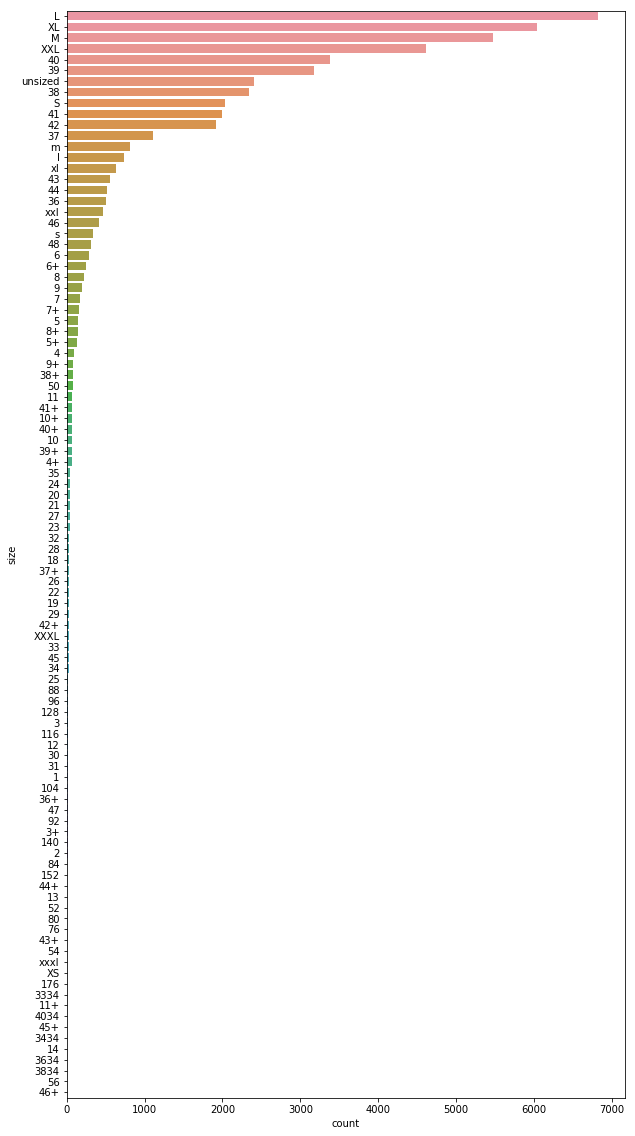

In [78]:
#visualisasi data size
plt.figure(figsize = (10, 20))
sns.countplot(y="size", data=df_pred, order = df_pred["size"].value_counts().index)
plt.show()

In [79]:
#mengubah isi data size yang ukurannya huruf kecil dengan huruf kapital agar terhitung menjadi jenis yang sama.
df_pred['size'] = df_pred['size'].str.upper()

In [80]:
#menghilangkan karakter "+"
df_pred['size'] = df_pred['size'].str.replace('+', '')

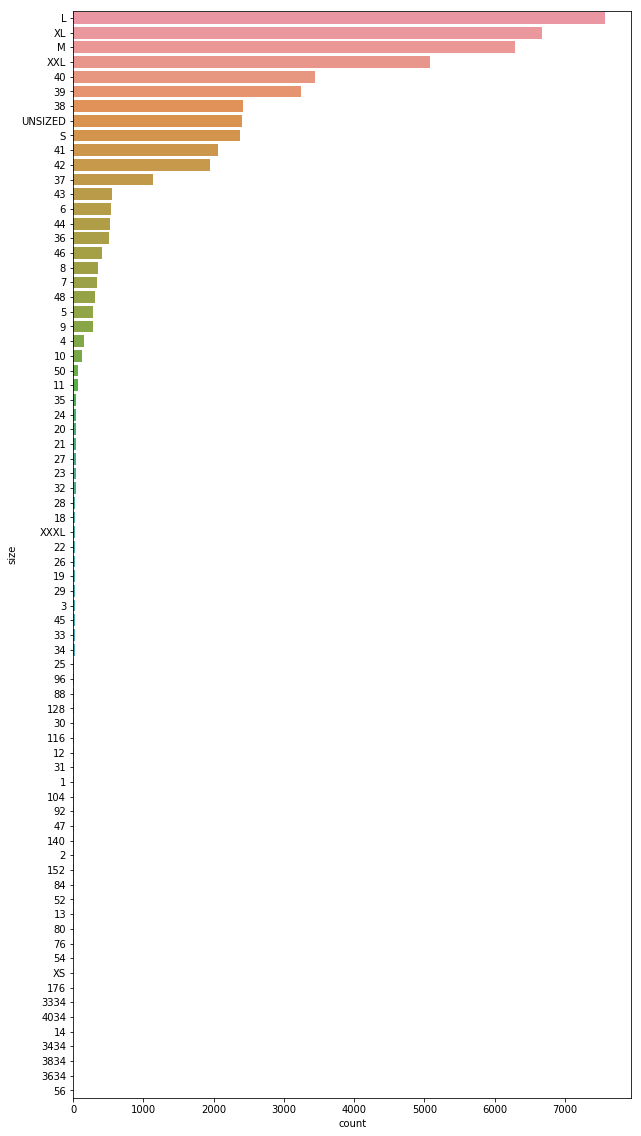

In [81]:
#visualisasi data size
plt.figure(figsize = (10, 20))
sns.countplot(y="size", data=df_pred, order = df_pred["size"].value_counts().index)
plt.show()

In [82]:
#cek atribut dengan tipe data objek
df_obj= df_pred.select_dtypes(include = ['object'])
df_obj.head()

,orderDate,size,color,salutation,state,creationDate
0,2013-04-01,43,magenta,Mrs,Hesse,2012-04-23
1,2013-04-01,43,grey,Mrs,Hesse,2012-04-23
2,2013-04-01,9,ecru,Mrs,Hesse,2012-04-23
3,2013-04-01,42,brown,Mrs,Hesse,2012-04-23
4,2013-04-01,43,grey,Mrs,Hesse,2012-04-23


In [83]:
#konversi data tipe objek menjadi kategori
#mengubah type data objek selain format tanggal menjadi kategori
kategori = ['size', 'color', 'salutation', 'state']
#Looping untuk merubah type data'
for column in kategori:
    df_pred[column] = df_pred[column].astype('category')

In [84]:
#mengubah type data objek dengan format tanggal menjadi datetime64[ns]
#konversi data atribut orderDate menjadi datetime64[ns]
df_pred["orderDate"] = df_pred["orderDate"].astype("datetime64[ns]")
#Konversi data atribut creationDate menjadi datetime64[ns]
df_pred["creationDate"] = df_pred["creationDate"].astype("datetime64[ns]")

In [85]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50078 entries, 0 to 50077
Data columns (total 13 columns):
orderItemID       50078 non-null int64
orderDate         50078 non-null datetime64[ns]
deliveryDate      50078 non-null datetime64[ns]
itemID            50078 non-null int64
size              50078 non-null category
color             50078 non-null category
manufacturerID    50078 non-null int64
price             50078 non-null float64
customerID        50078 non-null int64
salutation        50078 non-null category
dateOfBirth       50078 non-null datetime64[ns]
state             50078 non-null category
creationDate      50078 non-null datetime64[ns]
dtypes: category(4), datetime64[ns](4), float64(1), int64(4)
memory usage: 3.6 MB


In [86]:
df_pred.isnull().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
dtype: int64

In [87]:
from pandas.api.types import CategoricalDtype
cat_col = ["size", "color", "salutation", "state"]
for col in cat_col:
    ktg = CategoricalDtype(categories = df2[col].cat.categories, ordered=True)
    df_pred[col] = df_pred[col].astype(ktg)

In [88]:
#mengaplikasikan one hot encoding untuk data bertipe categorical pada data prediksi
df_pred=pd.get_dummies(data=df_pred, columns=['size', 'color', 'salutation', 'state'])

In [89]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50078 entries, 0 to 50077
Columns: 209 entries, orderItemID to state_Thuringia
dtypes: datetime64[ns](4), float64(1), int64(4), uint8(200)
memory usage: 13.0 MB


In [90]:
#mengubah data tanggal 
import datetime as dt
df_pred['orderDate'] = df_pred['orderDate'].map(dt.datetime.toordinal)
df_pred['deliveryDate'] = df_pred['deliveryDate'].map(dt.datetime.toordinal)
df_pred['dateOfBirth'] = df_pred['dateOfBirth'].map(dt.datetime.toordinal)
df_pred['creationDate'] = df_pred['creationDate'].map(dt.datetime.toordinal)

In [91]:
with open ('D:\\dmw\\dataset\\dmc_pick.pickle', 'rb') as fp:
    X_train_column = list(pickle.load(fp))
    
df_pred = df_pred[X_train_column]

In [92]:
#Prediksi dengan model yang sudah disimpan
clf = jb.load("D:\\dmw\\dataset\\dmc_job.joblib")
result = clf.predict(df_pred)

C:\Users\acer\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [93]:
print(result[:100])

[1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0]
